# BSc Computer Science
## CM3005 - Data Science
### Midterm Coursework: Apply Linear Regression

### Introduction

This report is designed to guide through the process of utilizing a linear regression algorithm alongside data visualization tools and statistical analysis techniques to address a domain-specific problem. The primary objective is to identify and analyze a dataset with a linear trendline, focusing on the automotive industry, particularly the comprehensive inventory data provided by MarketCheck(Kaggle Dataset).

## Introduction to the Domain:

The automobile sector has been selected as the project's domain, with a particular emphasis on the used car market in the US and Canada. This is a large and dynamic subject that is impacted by a number of variables, such as customer preferences, technology improvements, and the state of the economy. A thorough examination of the vehicle inventory is possible with the help of MarketCheck's data, which includes information on year, make, model, and VIN-level histories. Analysis and insight into consumer behavior, pricing tactics, and market trends can be gained from this extensive dataset.

### Relevance of Linear Regression:

Linear regression is particularly suitable for this domain for several reasons:

<b>Price Prediction:</b> Based on a number of factors, including age, make, model, mileage, and condition, it can assist in estimating the cost of a car. Price, the dependent variable, changes as the independent variables (vehicle features) do in this linear relationship.

<b>Trend Analysis:</b> The popularity of particular models or features, or the depreciation of automobile values over time, are examples of trends that can be found using linear regression.

<b>Demand Forecasting:</b> By using past data, it may predict demand for various car models, assisting manufacturers and dealerships in scheduling production and inventories.

<b>Feature Importance:</b> By assisting sellers in their marketing plans and customers in their decision-making, linear regression can provide light on how various features affect a vehicle's popularity or price.


### Objectives of the Project:

The goal of predictive modeling is to create a linear regression model that, using historical data and a vehicle's features, can reliably estimate a car's price.

<b>Market insight:</b> To examine patterns and trends in the used automobile market and offer insights into the variables influencing car popularity and prices.

<b>Data Preprocessing:</b> To show that one is capable of cleaning and preparing a real-world dataset so that it is ready for modeling and analysis.

<b>Assessment and Improvement:</b> To assess the linear regression model's performance and look into new methods or information that can raise the model's precision and applicability.


The automobile sector requires precise price forecasts and market data to help firms and consumers make informed decisions. This justifies those previous aims.


### Impact and Contribution:

<b>Informed Decision Making:</b> The initiative can assist consumers in making knowledgeable selections when purchasing or disposing of automobiles by offering precise pricing forecasts and market insights.

<b>Business Strategy:</b> By modifying their inventory, pricing plans, and marketing initiatives, dealerships and manufacturers may be able to boost sales and customer satisfaction.

<b>Market Understanding:</b> Gaining a better understanding of the used car market through the project's identification of trends and variables affecting supply and demand might be beneficial.

<b>Academic Contribution:</b> The project can advance knowledge in the field of data science and its applications in the automobile sector by documenting the methodology and results.


# 

## Dataset Overview:

The primary information, which comes from MarketCheck, is an extensive list of used cars available in both the US and Canada. It gathers daily data from more than 65,000 dealer websites over a period of more than eight years. Every entry in the collection offers comprehensive details about specific vehicle listings, encompassing characteristics such as year, make, model, trim, histories at the VIN level, and more. This vast data collection provides a detailed picture of the automotive business by highlighting consumer trends, tastes, and industry-influencing economic variables.

## Source and Acquisition:

The dataset was obtained from MarketCheck, a reliable automobile industry source renowned for its comprehensive and current data aggregation. MarketCheck gathers this data by regularly scanning more than 65,000 dealer websites, guaranteeing an accurate and up-to-date picture of the market. The data can be viewed on MarketCheck's website or on websites like Kaggle, where it is identified as "MarketCheck's Automotive Data." It is available for public examination.

## Dataset Characteristics:

* <b>Size:</b> With daily updates, the dataset contains a significant amount of data spanning eight years of automotive inventories. Although the precise number of records isn't stated, it's advised to choose a subset of fewer than 10,000 entries for quicker processing and that the amount is reasonable.

* <b>Structure:</b> The data is organized in CSV format and consists of multiple files that most likely relate to various parts of the inventory, including dealer information, VIN histories, and listings.

* <b>Data Types:</b> Both categorical and numerical data are present in the dataset. Year, price, kilometers, and engine size are examples of numerical data; make, model, trim, body style, vehicle type, drivetrain, transmission, and fuel type are examples of category data.

* <b>Missing Values:</b> The dataset is expected to have missing values and imperfections, making it ideal for practicing data preprocessing techniques.

## Relevance to Objectives:

The following factors make this dataset especially appropriate for the project's goals:

<b>Predictive Modeling:</b> A robust basis for developing a predictive model for automobile prices is provided by the multitude of information associated with automotive history and specifications.

<b>Market Insight:</b> In line with the goal of comprehending market dynamics, the vast data set spanning more than eight years permits trend analysis and market insight.

<b>Data Preprocessing Practice:</b> The dataset provides a useful example for implementing data cleaning and preprocessing techniques due to its flaws and missing values.

<b>Real-World Application:</b> The dataset is a great example of applying data science in a useful, industry-relevant setting since it captures the complexity and variety of the actual world.


# 

## Load the America and Canada Dataset

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [2]:
# Load the CSV file into a Pandas DataFrame
df_canada = pd.read_csv(r'C:\Users\moham\Desktop\Sem 3-1\Data Science\Midterm\Vehicle Data Predcistion Us and Canada\ca-dealers-used.csv',low_memory=False)
df_america = pd.read_csv(r'C:\Users\moham\Desktop\Sem 3-1\Data Science\Midterm\Vehicle Data Predcistion Us and Canada\us-dealers-used.csv',low_memory=False)

#Set low_memory=False is an option to forces Pandas to read more of the file before deciding the data type of each column

In [42]:
df_canada.head()
#Canada Car Dataframe

,price,miles,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,fuel_type,engine_size,city
0,179999.0,9966.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,Edmundston
1,179995.0,5988.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,Notre-dame-des-pins
2,168528.0,24242.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,Coquitlam
3,220000.0,6637.0,2020.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,Pickering
4,220000.0,6637.0,2020.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,Pickering


In [43]:
df_america.head()
#America Car Dataframe

,price,miles,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,fuel_type,engine_size,city
0,20998.0,115879.0,2015.0,Chevrolet,Express Cargo,Work Van,Cargo Van,Truck,RWD,Automatic,E85 / Unleaded,4.8,Ellicott City
1,27921.0,7339.0,2018.0,BMW,i3,s,Hatchback,Car,RWD,Automatic,Electric / Premium Unleaded,0.6,Pompano Beach
2,11055.0,39798.0,2018.0,Mitsubishi,Mirage G4,SE,Sedan,Car,FWD,Automatic,Unleaded,1.2,West Bend
3,52997.0,28568.0,2019.0,Chevrolet,Colorado,ZR2,Pickup,Truck,4WD,Automatic,Diesel,2.8,Layton
5,NaN,54276.0,2015.0,BMW,i3,Giga World,Hatchback,Car,RWD,Automatic,Electric / Premium Unleaded,0.6,Kernersville


In [44]:
df_canada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311105 entries, 0 to 393602
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         288653 non-null  float64
 1   miles         311105 non-null  float64
 2   year          311105 non-null  float64
 3   make          311105 non-null  object 
 4   model         311105 non-null  object 
 5   trim          311105 non-null  object 
 6   body_type     311105 non-null  object 
 7   vehicle_type  311105 non-null  object 
 8   drivetrain    311105 non-null  object 
 9   transmission  311105 non-null  object 
 10  fuel_type     311105 non-null  object 
 11  engine_size   311105 non-null  float64
 12  city          305183 non-null  object 
dtypes: float64(4), object(9)
memory usage: 33.2+ MB


In [45]:
df_america.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 832412 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         775874 non-null  float64
 1   miles         832412 non-null  float64
 2   year          832412 non-null  float64
 3   make          832412 non-null  object 
 4   model         832412 non-null  object 
 5   trim          832412 non-null  object 
 6   body_type     832412 non-null  object 
 7   vehicle_type  832412 non-null  object 
 8   drivetrain    832412 non-null  object 
 9   transmission  832412 non-null  object 
 10  fuel_type     832412 non-null  object 
 11  engine_size   832412 non-null  float64
 12  city          830893 non-null  object 
dtypes: float64(4), object(9)
memory usage: 88.9+ MB


## Pre-Processing

Deciding which columns to remove from a dataset, the key is to consider the relevance and potential impact of each column on  analysis. For a used car price prediction model, the main objective is to keep features that can influence a car's price. 

### Car Data Dictonary 

* id - Usually a unique identifier with no predictive power.
* vin - While unique to each vehicle, the VIN itself doesn't predict price unless decoded.
* price - This is target variable, so it's crucial.
* miles - Highly relevant as mileage significantly impacts a car's value.
* stock_no - Dealer's internal stock number, typically irrelevant for price prediction.
* year - Very important, as the vehicle's age affects its value.
* make - Critical for identifying the brand's impact on price.
* model - Essential as different models have different values.
* trim - Can influence price due to different feature sets.
* body_type - Relevant as certain body types are valued differently.
* vehicle_type - Might be redundant if similar to body type, but can be useful in some contexts.
* drivetrain - Important, as it can affect vehicle performance and price.
* transmission - Significant, as it influences driving experience and value.
* fuel_type - Important, especially with varying fuel economy and performance.
* engine_size - Affects performance and, consequently, price.
* engine_block - Might provide some insight, but often less critical than other features.
* zip,seller_name,street,state,id -  might not be as precise as needed for a model.


### Dropping columns

In [3]:
# Dropping the less useful columns from both datasets
df_canada = df_canada.drop(columns=['zip', 'seller_name', 'street','state','id', 'vin', 'stock_no','engine_block'])
df_america = df_america.drop(columns=['zip', 'seller_name', 'street','state','id', 'vin', 'stock_no','engine_block'])


<b>Removing Irrelevant Features:</b> Dropped columns that were less relevant to analysis, such as 'zip', 'seller_name', 'street', 'state', 'id', 'vin', 'stock_no', and 'engine_block'. This helped focus the dataset on features likely to influence car prices and other relevant outcomes.

### Filter the datasets

In [4]:
# Filter the datasets for vehicles from 2015 to 2022
df_canada = df_canada[(df_canada['year'] >= 2015) & (df_canada['year'] <= 2022)]
df_america = df_america[(df_america['year'] >= 2015) & (df_america['year'] <= 2022)]


<b>Filtering Data:</b> Filtered the dataset for vehicles from the years 2015 to 2022. This step ensured the data was not only relevant and manageable for analysis but also represented the most recent trends and conditions in the used car market, which are crucial for accurate predictive modeling and market insight.

### Handling the NaN Values

In [5]:
# Display the number of missing values in each column
missing_values = df_canada.isnull().sum()
print('Missing values in Canada')
print(missing_values[missing_values > 0])

print("*************************")

# Display the number of missing values in each column
missing_values = df_america.isnull().sum()
print('Missing values in America')
print(missing_values[missing_values > 0])


Missing values in Canada
price           22452
miles           21343
model            3614
trim            26759
body_type       26241
vehicle_type    29703
drivetrain      27467
transmission    24734
fuel_type       52139
engine_size     54221
city             5922
dtype: int64
*************************
Missing values in America
price           56538
miles            6186
model             425
trim             1037
body_type        2354
vehicle_type     3246
drivetrain       1051
transmission      942
fuel_type        4072
engine_size     12647
city             1519
dtype: int64


### Impute missing values  with the mean of each column

In [6]:

# Impute missing values for 'miles' and 'engine_size' with the mean of each column in the Canada dataset
df_canada['miles'].fillna(df_canada['miles'].mean(), inplace=True)
df_canada['engine_size'].fillna(df_canada['engine_size'].mean(), inplace=True)

# Impute missing values for 'miles' and 'engine_size' with the mean of each column in the America dataset
df_america['miles'].fillna(df_america['miles'].mean(), inplace=True)
df_america['engine_size'].fillna(df_america['engine_size'].mean(), inplace=True)


### Replacing missing values with the most frequent value

In [7]:
# Define the categorical columns for which want to impute missing values
categorical_columns = ['model', 'trim', 'body_type', 'vehicle_type', 'drivetrain', 'transmission', 'fuel_type']

# For Canada
for column in categorical_columns:
    # Calculate the mode (the most common value)
    mode_value = df_canada[column].mode()[0]
    
    # Replace missing values with the mode
    df_canada[column].fillna(mode_value, inplace=True)

# For America
for column in categorical_columns:
    # Calculate the mode (the most common value)
    mode_value = df_america[column].mode()[0]
    
    # Replace missing values with the mode
    df_america[column].fillna(mode_value, inplace=True)

<b>Handling Missing Values:</b> Identified and filled missing values in the 'miles' and 'engine_size' columns with the mean of each column. For categorical variables like 'model', 'trim', 'body_type', etc.,  replaced missing values with the most frequent value (mode). This approach helped maintain data integrity and avoid biases that could arise from dropping rows with missing values. This is a critical step in data preprocessing, especially when the goal is to maintain the integrity of the dataset and ensure robust analysis and modeling.

### Displaying the number of missing values in each column after Handling NaN Values

In [8]:
# Display the number of missing values in each column
missing_values = df_canada.isnull().sum()
print('Missing values in Canada')
print(missing_values[missing_values > 0])

print("*************************")

# Display the number of missing values in each column
missing_values = df_america.isnull().sum()
print('Missing values in America')
print(missing_values[missing_values > 0])


Missing values in Canada
price    22452
city      5922
dtype: int64
*************************
Missing values in America
price    56538
city      1519
dtype: int64


As 'price' is the target variable, we shouldn't impute these missing values for the training set. Instead, consider using these rows as part of a test set to predict prices once our model is trained.

## Separating dataset into training set and test set

In [9]:
# Separate the data into two DataFrames based on whether 'price' is missing

#Canada Dataset
canada_train_set = df_canada[df_canada['price'].notnull()]
canada_test_set = df_canada[df_canada['price'].isnull()]

#America Dataset
america_train_set = df_america[df_america['price'].notnull()]
america_test_set = df_america[df_america['price'].isnull()]


By splitting our data this way, we are effectively creating a realistic scenario where our model's purpose is to predict prices for listings where they aren't initially available, mimicking a common use case for such models in the real world.

### Randomly choosing 10000 data from each training set

In [10]:
# Randomly sample 10000 rows from each training set
canada_train_set = canada_train_set.sample(n=10000)
america_train_set = america_train_set.sample(n=10000)

#  

# Statistical Analysis

In [11]:
# Calculate descriptive statistics for the Canadian dataset
canada_train_set.describe()

,price,miles,year,engine_size
count,10000.00000,1.000000e+04,10000.00000,10000.000000
mean,29287.69330,5.715693e+04,2017.79660,2.693355
std,20742.88688,3.992376e+04,1.58129,1.083609
min,5099.00000,0.000000e+00,2015.00000,0.900000
25%,17900.00000,3.087825e+04,2017.00000,2.000000
50%,24695.50000,5.387300e+04,2018.00000,2.500000
75%,35250.00000,7.594650e+04,2019.00000,3.000000
max,679900.00000,1.568884e+06,2021.00000,7.300000


#### Price:
- **Range:** 4,330 to 488,888, indicating a mix of budget and luxury vehicles.
- **Distribution:** Mean (28,712) higher than median (24,792), suggesting a right-skewed distribution with some high-priced outliers.

#### Miles:
- **Range:** 0 to 353,631 miles, from nearly new to heavily used cars.
- **Average Use:** Mean (57,472 miles) close to median (53,553 miles), indicating a relatively even distribution.

#### Year:
- **Recency:** Cars range from 2015 to 2022, mostly recent models.
- **Most Listings:** Majority are from 2017 to 2019, indicating a preference for 3 to 6-year-old cars.

#### Engine Size:
- **Range:** 0.6 to 7.3, suggesting a variety from compact cars to larger vehicles.
- **Common Sizes:** Most engines are between 2.0 and 3.0, typical for consumer vehicles.

In [12]:
# Calculate descriptive statistics for the American dataset
america_train_set.describe()

,price,miles,year,engine_size
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,27786.100400,36070.880534,2018.043400,2.301866
std,17535.105835,26469.329151,1.485913,0.868754
min,4900.000000,0.000000,2015.000000,0.600000
25%,18762.500000,17747.250000,2017.000000,2.000000
50%,23450.500000,30373.500000,2018.000000,2.000000
75%,31921.500000,47573.000000,2019.000000,2.500000
max,398998.000000,208990.000000,2021.000000,7.300000


### Price:
- **Range:** 2,000 to 387,896, showing a broad spectrum from very affordable to high-end vehicles.
- **Central Tendency:** Mean price is 27,778 with a median of 23,314, indicating a right-skewed distribution with some expensive outliers.
- **Variability:** Standard deviation of 17,107 suggests prices vary significantly across listings.

### Miles:
- **Range:** 0 to 485,353 miles, from unused to extremely high-mileage vehicles.
- **Usage:** Mean mileage is 36,382, with a median of 30,627, reflecting a typical usage pattern for relatively recent used cars.
- **Spread:** Standard deviation of 27,196 miles indicates a wide range in vehicle usage.

### Year:
- **Recency:** Vehicles range from 2015 to 2022, predominantly featuring recent models.
- **Most Common Years:** 50% of the cars are from 2017 to 2019, suggesting a dataset focused on newer used cars.

### Engine Size:
- **Range:** 0.6 to 7.3, indicating a mix from small economy cars to larger, more powerful vehicles.
- **Typical Engine Size:** Mean of 2.3 and median of 2.0, with most engines between 1.8 and 2.5, common for a wide range of consumer vehicles.

# 

## Measures of Spread

In [13]:
# Canada Dataset
std_dev_price = np.std(canada_train_set['price'])
variance_price = np.var(canada_train_set['price'])
range_price = np.ptp(canada_train_set['price'])  # Range as peak to peak
iqr_price = stats.iqr(canada_train_set['price'])  # Interquartile range

print("Standard Deviation of Price:", std_dev_price)
print("Variance of Price:", variance_price)
print("Range of Price:", range_price)
print("Interquartile Range of Price:", iqr_price)


Standard Deviation of Price: 20741.84970925299
Variance of Price: 430224329.3612383
Range of Price: 674801.0
Interquartile Range of Price: 17350.0


### Canada Dataset:
- **Standard Deviation (17,919.77):** Indicates a high variability in car prices. A larger standard deviation suggests prices are spread out over a wider range.
- **Variance (321,118,325.45):** The high variance further confirms the significant spread in the data, reinforcing the presence of a wide range of car prices.
- **Range (484,558):** The substantial range indicates a significant difference between the cheapest and most expensive cars, suggesting the dataset includes both budget and luxury vehicles.
- **Interquartile Range (17,095):** Most cars' prices fall within a $17,095 range, providing a more robust sense of the typical price spread unaffected by extreme values.



In [14]:
# America Dataset
std_dev_price = np.std(america_train_set['price'])
variance_price = np.var(america_train_set['price'])
range_price = np.ptp(america_train_set['price'])  # Range as peak to peak
iqr_price = stats.iqr(america_train_set['price'])  # Interquartile range

print("Standard Deviation of Price:", std_dev_price)
print("Variance of Price:", variance_price)
print("Range of Price:", range_price)
print("Interquartile Range of Price:", iqr_price)


Standard Deviation of Price: 17534.22905788898
Variance of Price: 307449188.6545183
Range of Price: 394098.0
Interquartile Range of Price: 13159.0


### America Dataset:
- **Standard Deviation (17,106.89):** Similar to the Canada dataset, this indicates a high variability in car prices in the US market.
- **Variance (292,645,552.16):** Also high, confirming a wide spread in car prices in the US.
- **Range (385,896):** A slightly smaller range than Canada but still indicates a broad spectrum of car prices from low to high.
- **Interquartile Range (13,988.50):** This is narrower than in Canada, suggesting that the middle 50% of car prices in the US are somewhat more clustered together than in Canada.

### Overall:
Both datasets show a high degree of variability in car prices, as indicated by the large standard deviations and variances. The substantial ranges suggest the inclusion of a wide variety of cars, from economical to luxury models. The interquartile ranges, which are less affected by extreme values, indicate that while there's a broad spectrum of prices, the middle 50% of prices are within a relatively narrower range. This information is crucial for understanding market dynamics and setting expectations for car pricing in both countries.

# Visualization

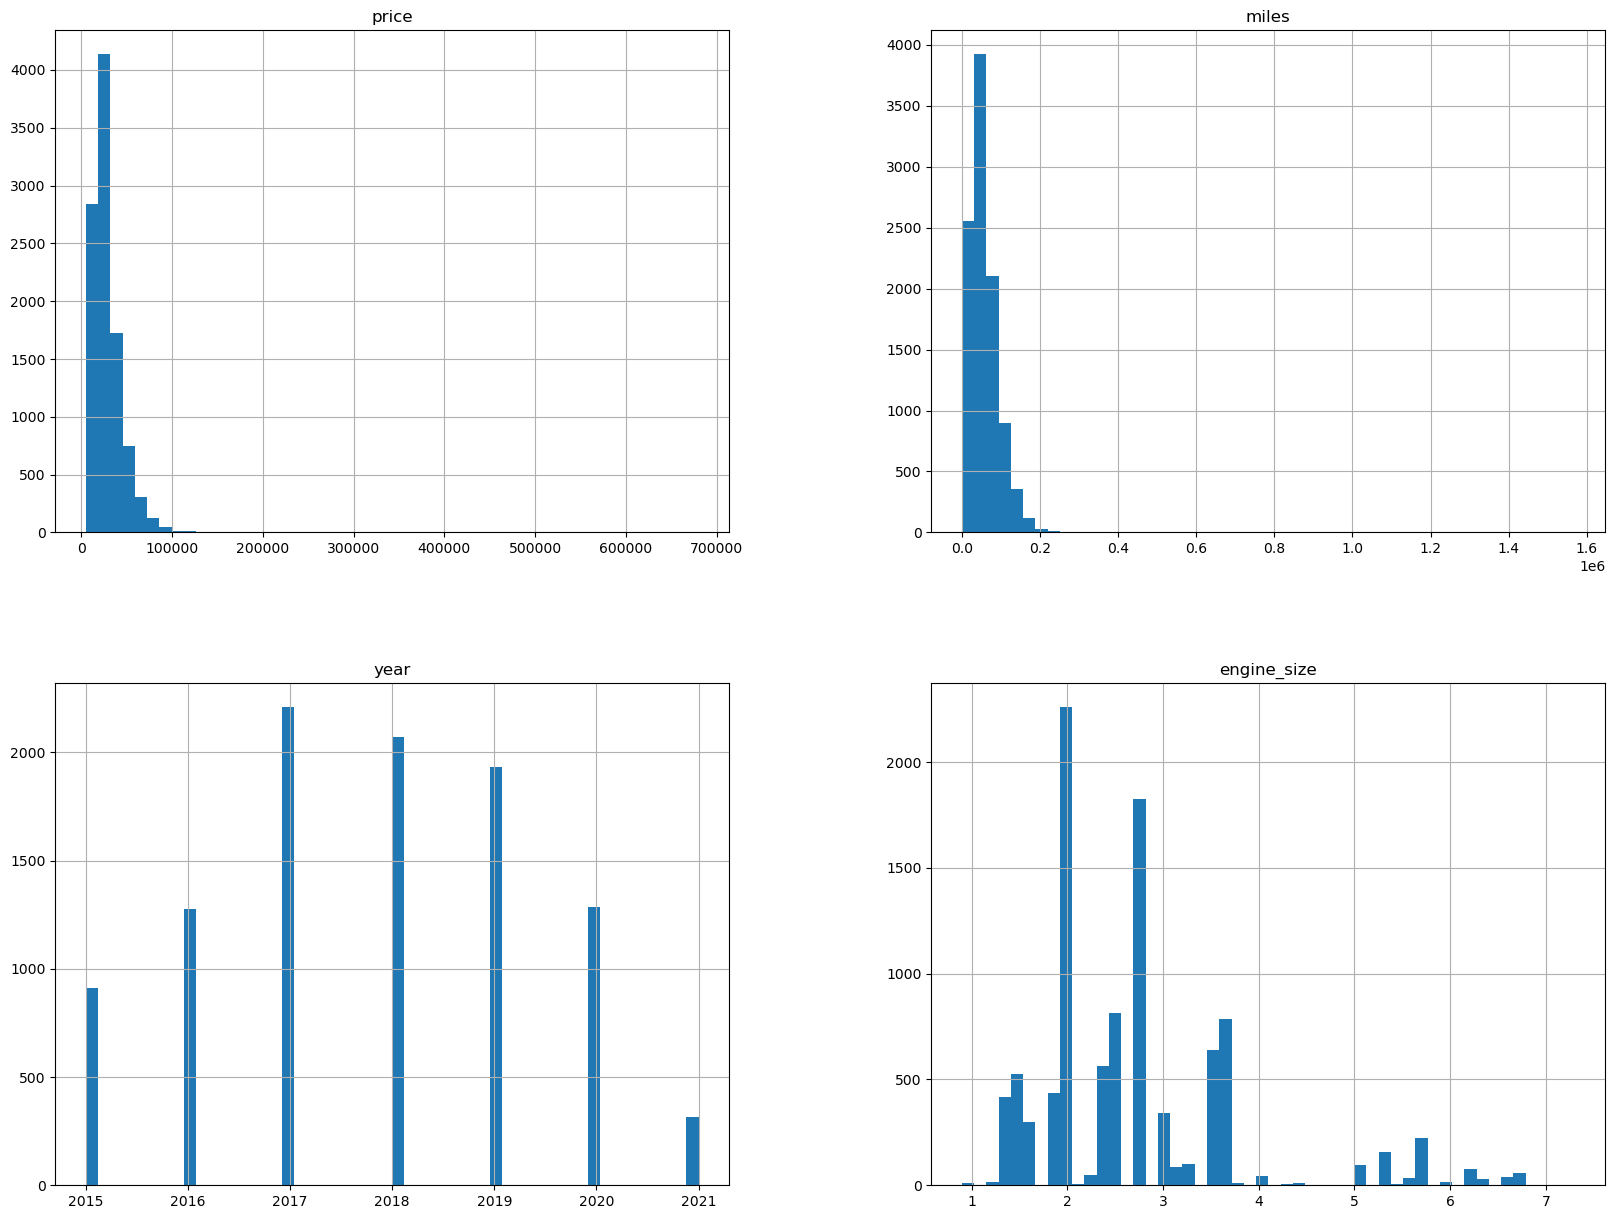

In [15]:
# Plotting distributions of features
import matplotlib.pyplot as plt
canada_train_set.hist(bins=50, figsize=(20,15))
plt.show()

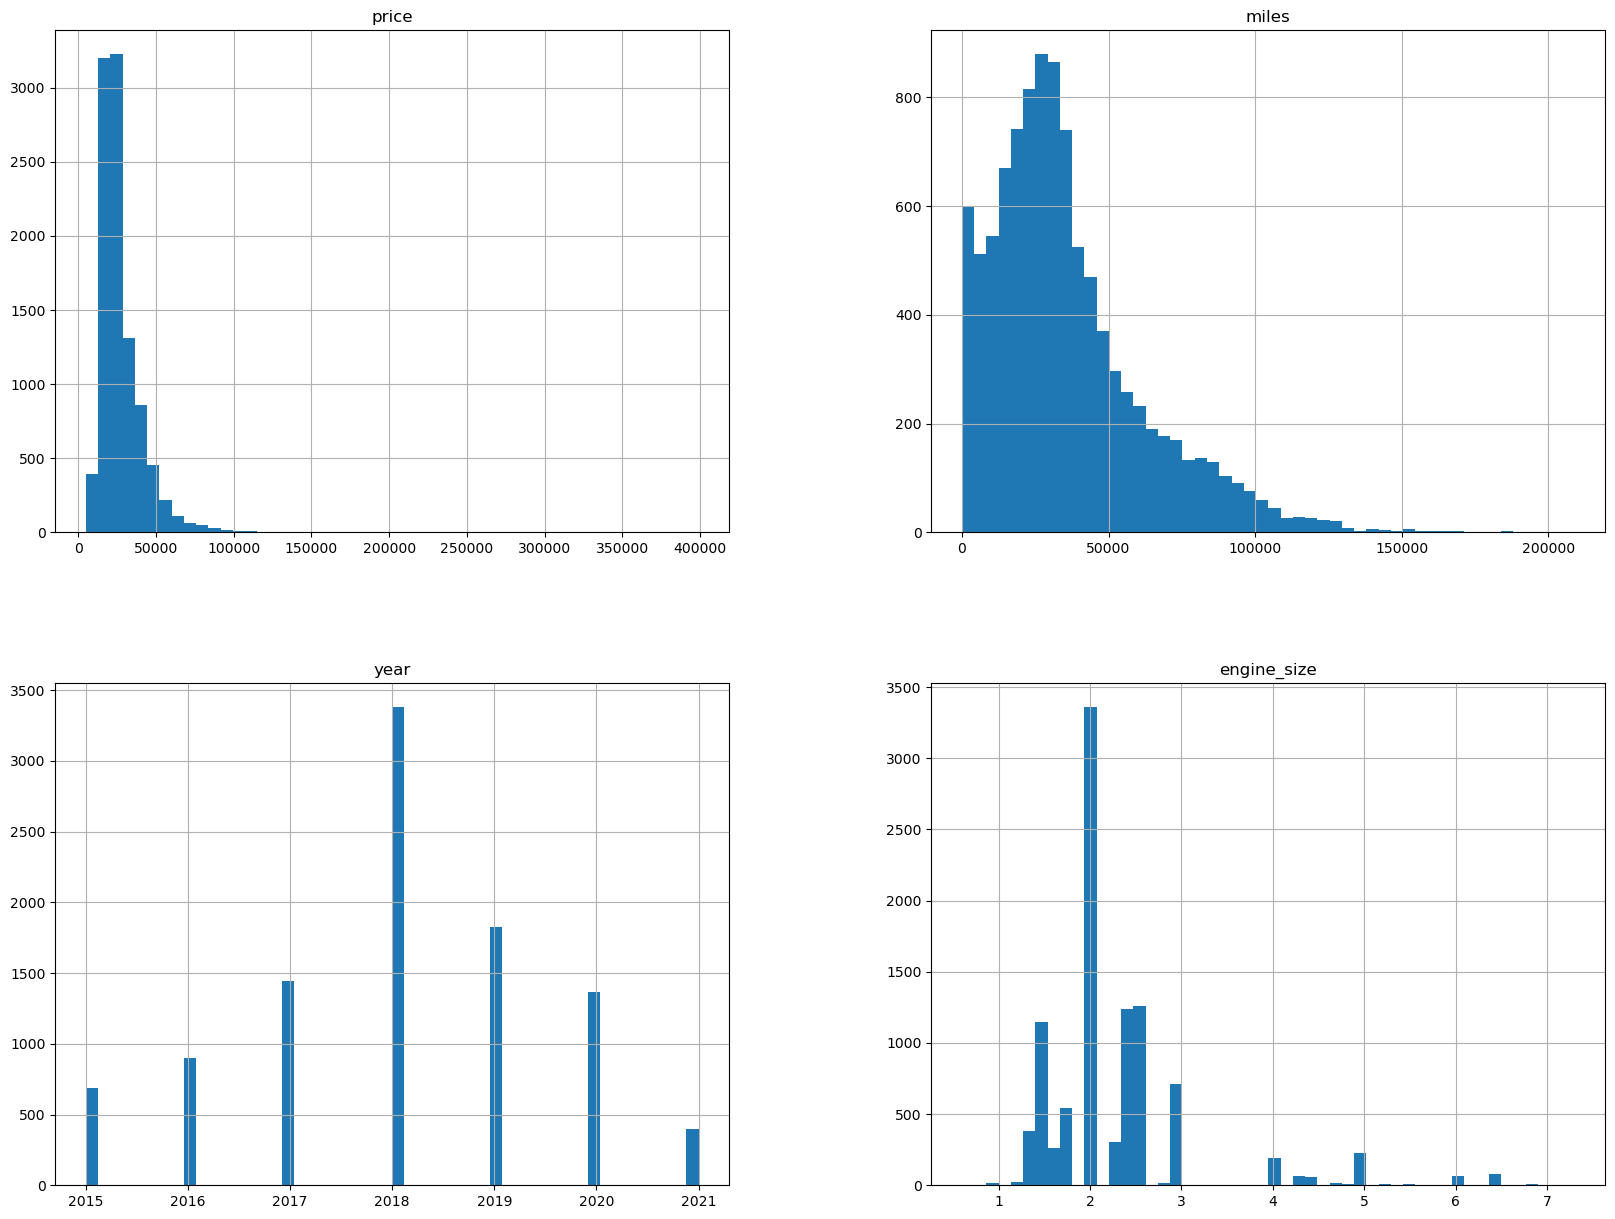

In [16]:
# Plotting distributions of features
import matplotlib.pyplot as plt
america_train_set.hist(bins=50, figsize=(20,15))
plt.show()

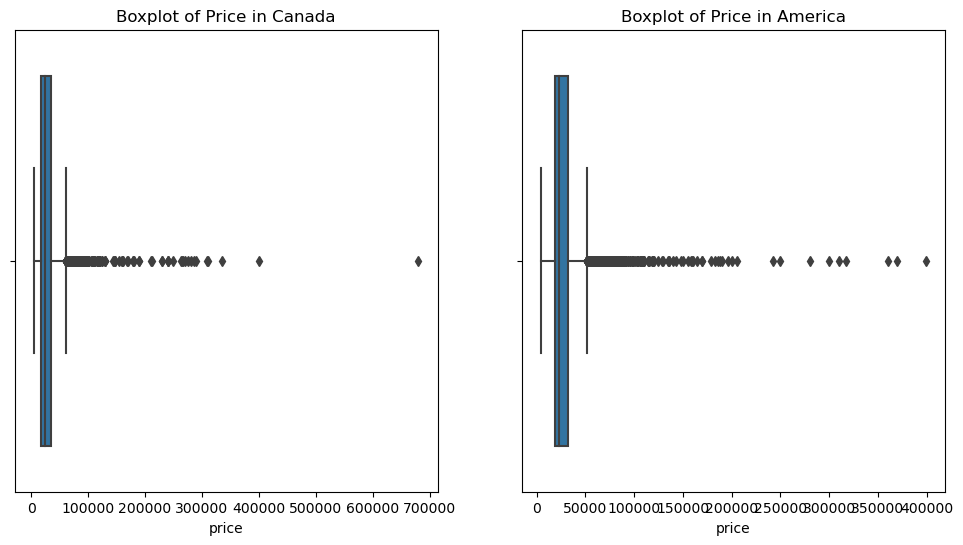

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the boxplots side by side for the 'Price' column from both datasets
plt.figure(figsize=(12, 6))

# Boxplot for Canada
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.boxplot(x=canada_train_set['price'])
plt.title('Boxplot of Price in Canada')

# Boxplot for America
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(x=america_train_set['price'])
plt.title('Boxplot of Price in America')

plt.show()


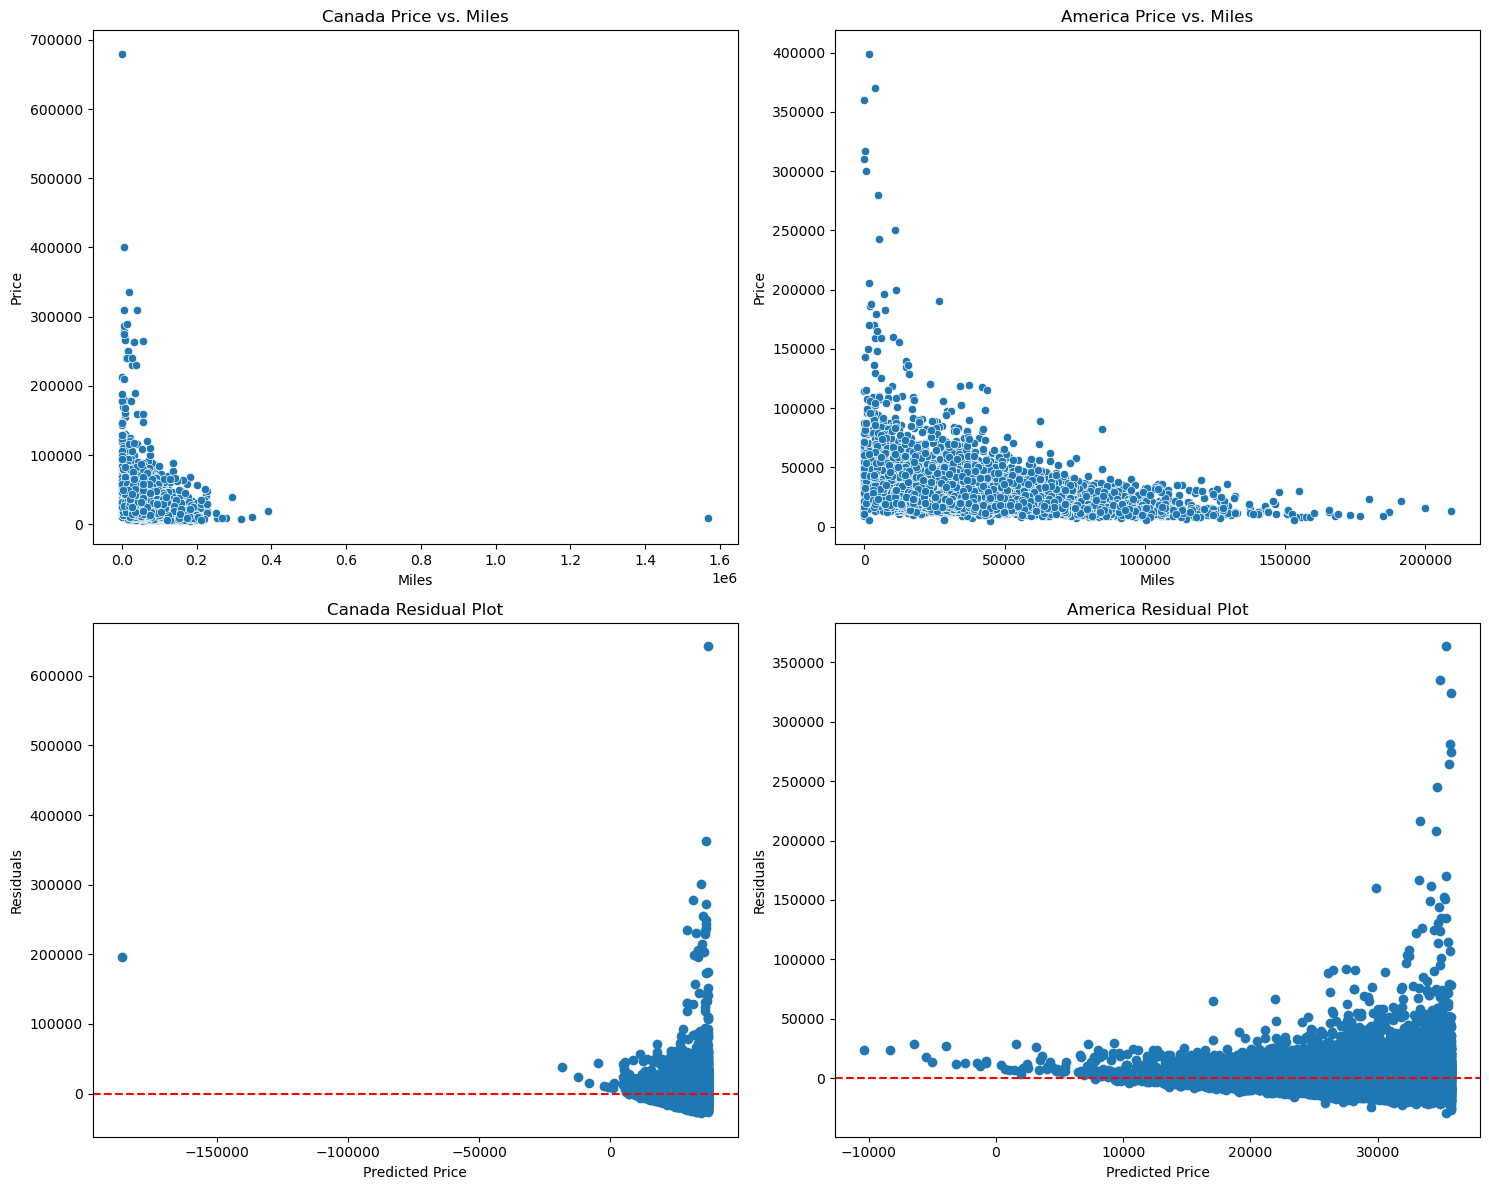

In [18]:
# Create a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Canada Scatter Plot
sns.scatterplot(x='miles', y='price', data=canada_train_set, ax=axs[0, 0])
axs[0, 0].set_title('Canada Price vs. Miles')
axs[0, 0].set_xlabel('Miles')
axs[0, 0].set_ylabel('Price')

# Canada Residual Plot
model_canada = LinearRegression()
model_canada.fit(canada_train_set[['miles']], canada_train_set['price'])
predicted_canada = model_canada.predict(canada_train_set[['miles']])
residuals_canada = canada_train_set['price'] - predicted_canada
axs[1, 0].scatter(predicted_canada, residuals_canada)
axs[1, 0].set_title('Canada Residual Plot')
axs[1, 0].set_xlabel('Predicted Price')
axs[1, 0].set_ylabel('Residuals')
axs[1, 0].axhline(y=0, color='red', linestyle='--')

# America Scatter Plot
sns.scatterplot(x='miles', y='price', data=america_train_set, ax=axs[0, 1])
axs[0, 1].set_title('America Price vs. Miles')
axs[0, 1].set_xlabel('Miles')
axs[0, 1].set_ylabel('Price')

# America Residual Plot
model_america = LinearRegression()
model_america.fit(america_train_set[['miles']], america_train_set['price'])
predicted_america = model_america.predict(america_train_set[['miles']])
residuals_america = america_train_set['price'] - predicted_america
axs[1, 1].scatter(predicted_america, residuals_america)
axs[1, 1].set_title('America Residual Plot')
axs[1, 1].set_xlabel('Predicted Price')
axs[1, 1].set_ylabel('Residuals')
axs[1, 1].axhline(y=0, color='red', linestyle='--')

# Adjust layout
plt.tight_layout()
plt.show()


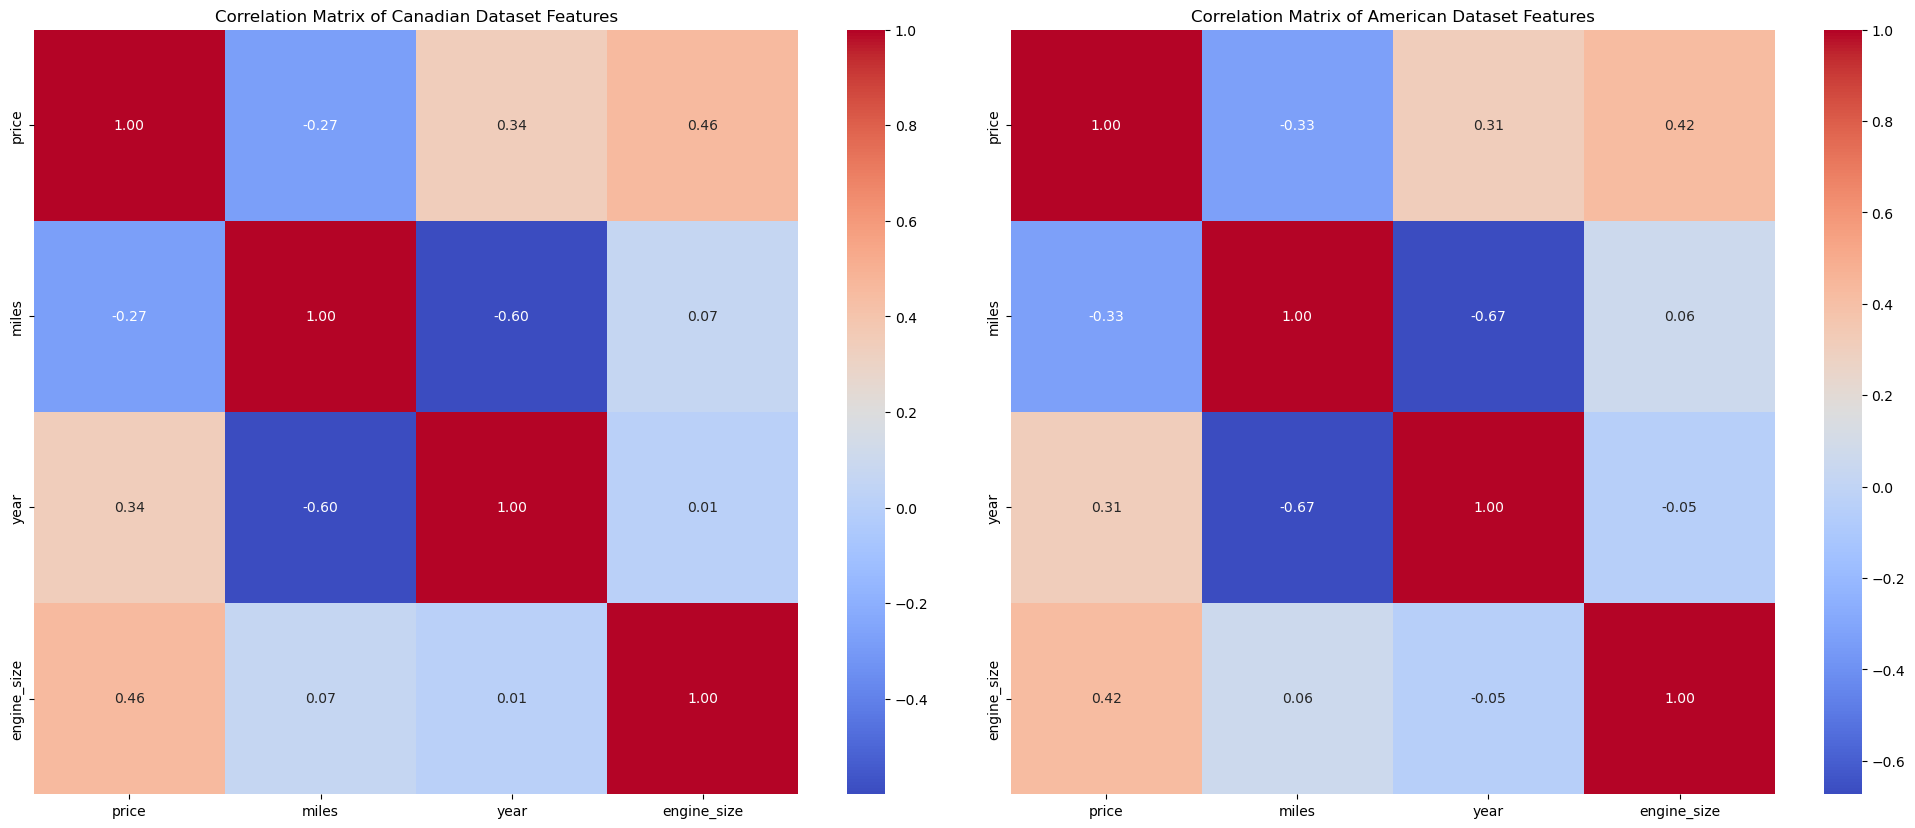

In [19]:
# Calculate the correlation matrix for Canada
canada_corr_matrix = canada_train_set.corr()

# Calculate the correlation matrix for America
america_corr_matrix = america_train_set.corr()

# Set up the matplotlib figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot the correlation matrix as a heatmap for Canada
sns.heatmap(canada_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, ax=ax1)
ax1.set_title('Correlation Matrix of Canadian Dataset Features')

# Plot the correlation matrix as a heatmap for America
sns.heatmap(america_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, ax=ax2)
ax2.set_title('Correlation Matrix of American Dataset Features')

# Show the plots side by side for comparison
plt.tight_layout()
plt.show()

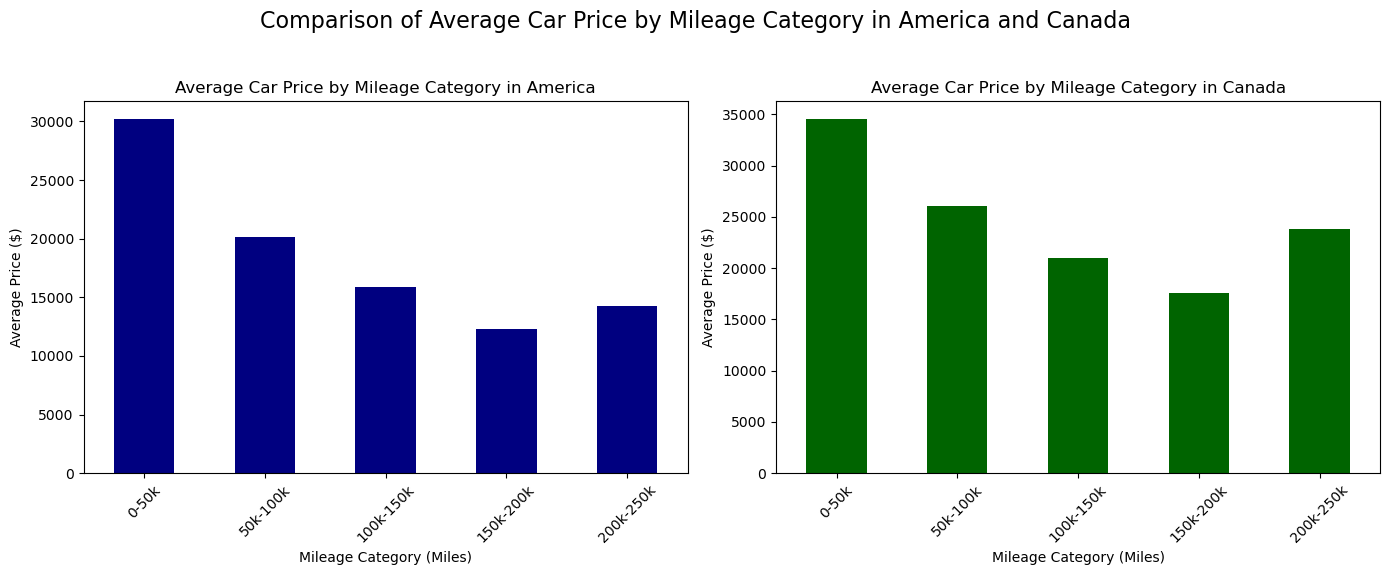

In [20]:
# Define bins for the mileage
bins = [0, 50000, 100000, 150000, 200000, 250000]
labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k']

# Binning for America
america_train_set['Mileage_Category'] = pd.cut(america_train_set['miles'], bins=bins, labels=labels, right=False)
# Calculate average price for each bin for America
america_average_price_per_bin = america_train_set.groupby('Mileage_Category')['price'].mean()

# Binning for Canada
canada_train_set['Mileage_Category'] = pd.cut(canada_train_set['miles'], bins=bins, labels=labels, right=False)
# Calculate average price for each bin for Canada
canada_average_price_per_bin = canada_train_set.groupby('Mileage_Category')['price'].mean()

# Set up the matplotlib figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plotting the bar graph for America
america_average_price_per_bin.plot(kind='bar', ax=ax1, color='navy')
ax1.set_title('Average Car Price by Mileage Category in America')
ax1.set_xlabel('Mileage Category (Miles)')
ax1.set_ylabel('Average Price ($)')
ax1.set_xticklabels(labels, rotation=45)

# Plotting the bar graph for Canada
canada_average_price_per_bin.plot(kind='bar', ax=ax2, color='darkgreen')
ax2.set_title('Average Car Price by Mileage Category in Canada')
ax2.set_xlabel('Mileage Category (Miles)')
ax2.set_ylabel('Average Price ($)')
ax2.set_xticklabels(labels, rotation=45)

# Add a common heading (suptitle) for the entire figure
fig.suptitle('Comparison of Average Car Price by Mileage Category in America and Canada', fontsize=16)

# Show the plots side by side for comparison
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### American Dataset
The American market, represented by the blue bars, shows a consistent decrease in average car prices as mileage increases. The highest average price is noted in the '0-50k' miles category at approximately 27,500, indicating a strong preference for lower-mileage vehicles. As expected, the '200k-250k' miles category registers the lowest average price, roughly $5,000, suggesting a significant drop in value as vehicles approach higher mileage thresholds.

### Canada Dataset
The Canadian market graph, depicted in green, mirrors the pattern observed in the American market, with the '0-50k' miles category again showing the highest average price. However, the decline in price with increasing mileage appears less steep in Canada. Notably, the '200k-250k' miles category in Canada maintains a higher average price point than in America, hovering around 7,500.


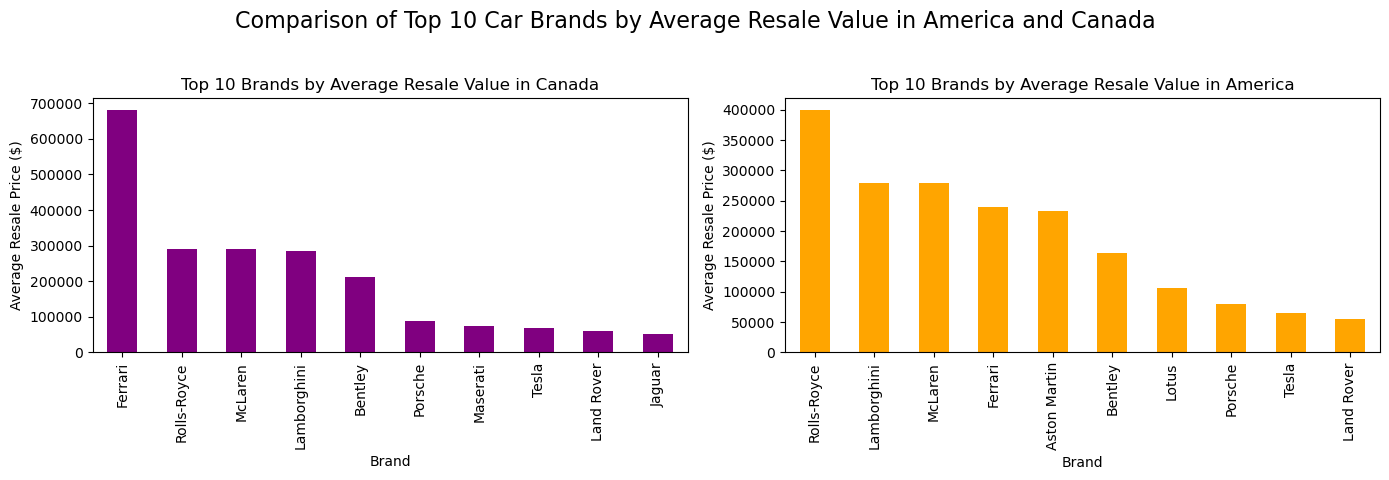

In [21]:
# Calculate the average price for each brand for Canada
canada_avg_price_per_brand = canada_train_set.groupby('make')['price'].mean().sort_values(ascending=False)
canada_avg_price_per_brand = canada_avg_price_per_brand.head(10)

# Calculate the average price for each brand for America
america_avg_price_per_brand = america_train_set.groupby('make')['price'].mean().sort_values(ascending=False)
america_avg_price_per_brand = america_avg_price_per_brand.head(10)

# Set up the matplotlib figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot the Canadian brand average prices
canada_avg_price_per_brand.plot(kind='bar', ax=ax1, color='purple')
ax1.set_title('Top 10 Brands by Average Resale Value in Canada')
ax1.set_xlabel('Brand')
ax1.set_ylabel('Average Resale Price ($)')

# Plot the American brand average prices
america_avg_price_per_brand.plot(kind='bar', ax=ax2, color='orange')
ax2.set_title('Top 10 Brands by Average Resale Value in America')
ax2.set_xlabel('Brand')
ax2.set_ylabel('Average Resale Price ($)')

# Add a common heading (suptitle) for the entire figure
fig.suptitle('Comparison of Top 10 Car Brands by Average Resale Value in America and Canada', fontsize=16)

# Show the plots side by side for comparison
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


The graph indicates that Rolls-Royce has the greatest average resale value in the Canadian market, followed by other high-end brands like Ferrari and Lamborghini. For example, Maserati has the lowest average resale value out of the top 10 mentioned brands.

In terms of resale value, Rolls-Royce is ranked first on the American market chart, closely followed by Ferrari and Lamborghini. Of the top brands shown, Maserati has the lowest resale value, same like Canada.

Overall, the two figures show that Maserati is at the bottom of the top 10 list, while luxury automobile manufacturers like Rolls Royce, Ferrari, and Lamborghini command the greatest resale values in both countries.


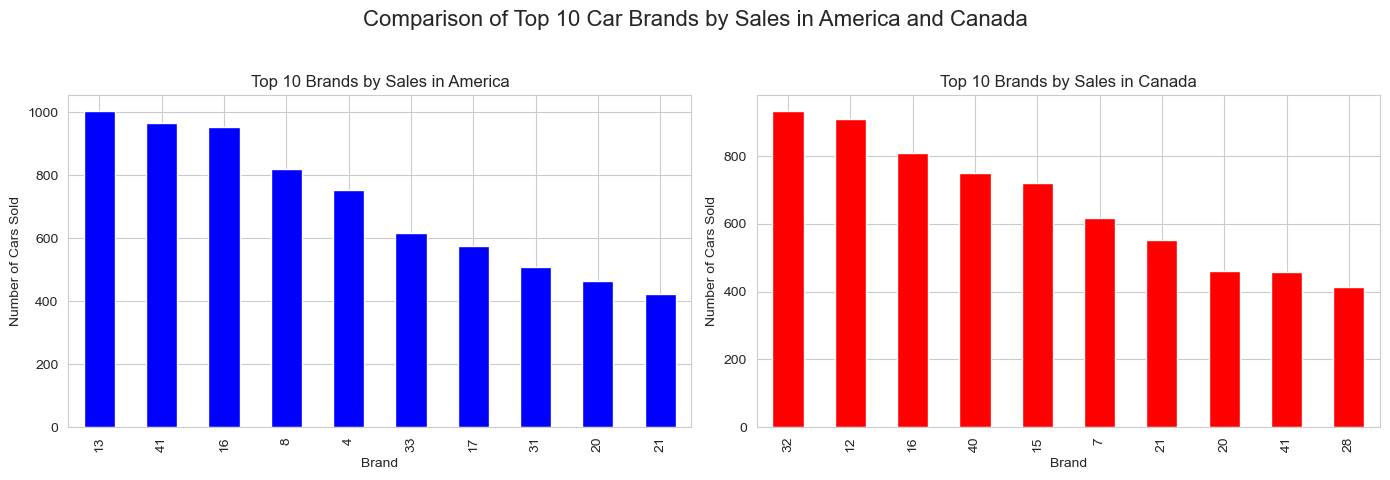

In [46]:
# Get the top 10 brands for America
america_brand_counts = america_train_set['make'].value_counts().head(10)

# Get the top 10 brands for Canada
canada_brand_counts = canada_train_set['make'].value_counts().head(10)

# Set up the matplotlib figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot the American brand counts
america_brand_counts.plot(kind='bar', ax=ax1, color='blue')
ax1.set_title('Top 10 Brands by Sales in America')
ax1.set_xlabel('Brand')
ax1.set_ylabel('Number of Cars Sold')

# Plot the Canadian brand counts
canada_brand_counts.plot(kind='bar', ax=ax2, color='red')
ax2.set_title('Top 10 Brands by Sales in Canada')
ax2.set_xlabel('Brand')
ax2.set_ylabel('Number of Cars Sold')

# Add a common heading (suptitle) for the entire figure
fig.suptitle('Comparison of Top 10 Car Brands by Sales in America and Canada', fontsize=16)

# Show the plots side by side for comparison
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()


In the American graph, represented by blue bars, Ford leads in sales, followed by Toyota and Honda. while the Canadian graph, shown with red bars, also shows Ford as the leading brand in sales, with Nissan and Hyundai closely following. 

Both graphs display a dominance of Ford in the car market, with a general decrease in sales among the subsequent brands in the top 10 list. The presence of different brands and their order in the two countries indicate varying consumer preferences and market strengths.

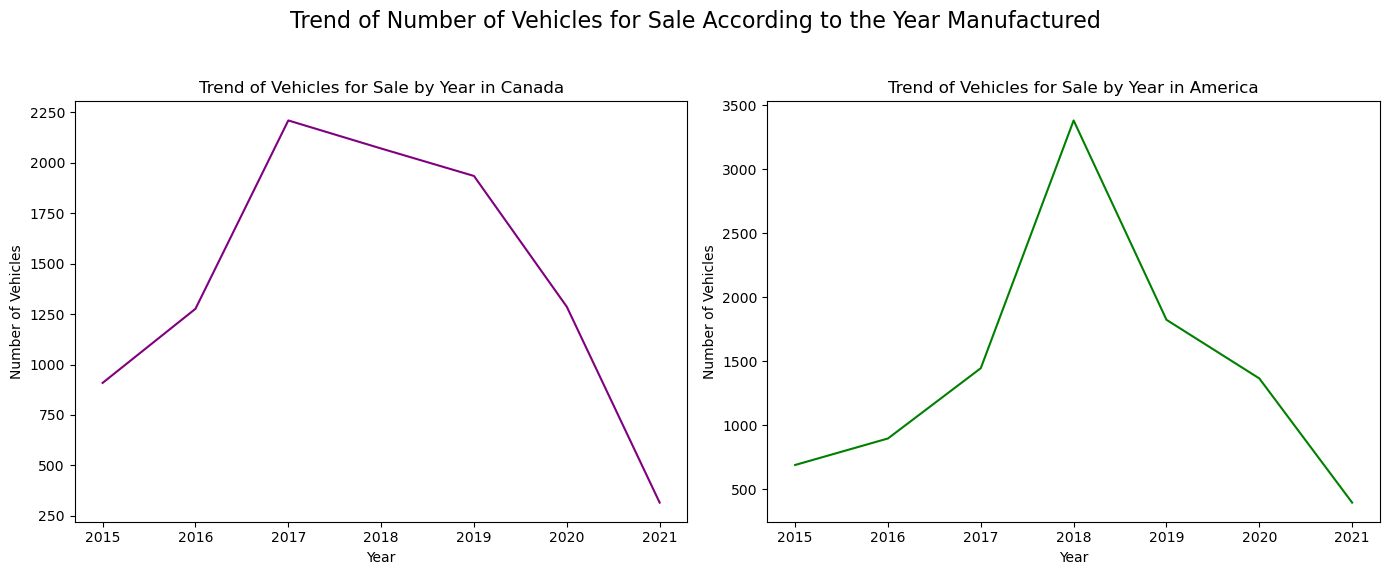

In [23]:
# Calculate the number of vehicles for sale each year for Canada
canada_yearly_counts = canada_train_set['year'].value_counts().sort_index()

# Calculate the number of vehicles for sale each year for America
america_yearly_counts = america_train_set['year'].value_counts().sort_index()

# Set up the matplotlib figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plotting the trend for Canada
canada_yearly_counts.plot(ax=ax1, color='purple')
ax1.set_title('Trend of Vehicles for Sale by Year in Canada')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Vehicles')

# Plotting the trend for America
america_yearly_counts.plot(ax=ax2, color='green')
ax2.set_title('Trend of Vehicles for Sale by Year in America')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Vehicles')

# Add a common heading (suptitle) for the entire figure
fig.suptitle('Trend of Number of Vehicles for Sale According to the Year Manufactured', fontsize=16)

# Show the plots side by side for comparison
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


The Canadian trend, represented by a purple line, peaks around 2018 with just under 2000 vehicles for sale, then shows a consistent decline through 2022.

The American trend, depicted by a green line, demonstrates a significant spike in the number of vehicles for sale in 2019, reaching nearly 3000. Post-2019, there's a sharp decline, returning to levels similar to those seen in 2015 by 2022.

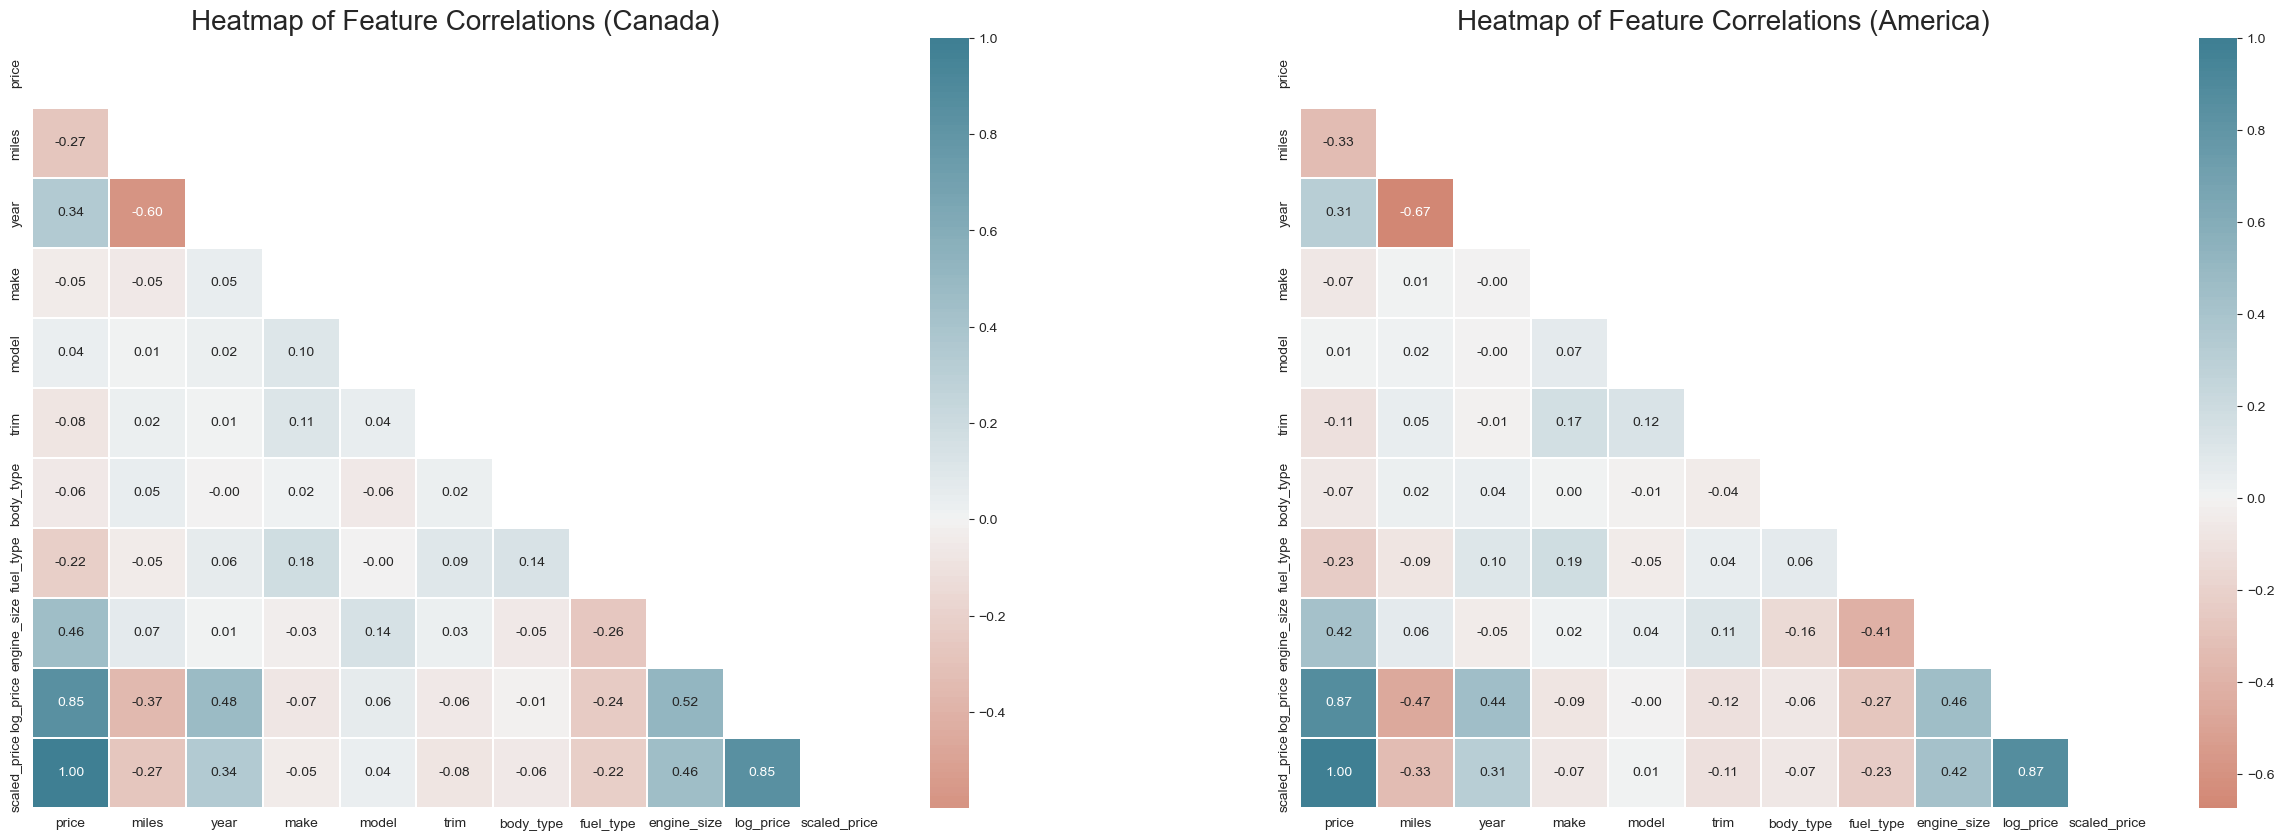

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Dummy datasets for demonstration purposes
# In practice, replace these with canada_train_set and america_train_set
canada_train = pd.DataFrame(np.random.rand(10, 10), columns=[f'feature{i}' for i in range(10)])
america_train = pd.DataFrame(np.random.rand(10, 10), columns=[f'feature{i}' for i in range(10)])

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Calculate the correlation matrices
corr_matrix_canada = canada_train_set.corr()
corr_matrix_america = america_train_set.corr()

# Generate a mask for the upper triangle
mask_canada = np.zeros_like(corr_matrix_canada, dtype=bool)
mask_canada[np.triu_indices_from(mask_canada)] = True

mask_america = np.zeros_like(corr_matrix_america, dtype=bool)
mask_america[np.triu_indices_from(mask_america)] = True

# Set up the matplotlib figure (adjust figsize to fit needs)
fig, ax = plt.subplots(1, 2, figsize=(30, 10))

# Draw the heatmaps
sns.heatmap(corr_matrix_canada, 
            cmap=sns.diverging_palette(20, 220, n=200),  # Choose a color map
            mask=mask_canada, 
            annot=True,  # Annotate the boxes with the correlation values
            center=0,
            fmt='.2f',  # Format for the annotations
            linewidths=0.1,  # Width of the lines that will divide each cell
            linecolor='white',
            ax=ax[0]  # This specifies which subplot to draw the heatmap on
           )

sns.heatmap(corr_matrix_america, 
            cmap=sns.diverging_palette(20, 220, n=200),
            mask=mask_america, 
            annot=True,
            center=0,
            fmt='.2f',
            linewidths=0.1,
            linecolor='white',
            ax=ax[1]  # This specifies which subplot to draw the heatmap on
           )

# Add titles to the heatmaps
ax[0].set_title("Heatmap of Feature Correlations (Canada)", fontsize=20)
ax[1].set_title("Heatmap of Feature Correlations (America)", fontsize=20)

plt.show()


# 

## Build ML (Machine Learning) model

## Log Transformation 

In [25]:
canada_train_set['log_price'] = np.log1p(canada_train_set['price'])  # log1p is used to handle log(0)

In [26]:
america_train_set['log_price'] = np.log1p(america_train_set['price'])  # log1p is used to handle log(0)

Now the data has a new column 'log_price' created by applying the log1p function from NumPy to the 'price' column. This function computes the natural logarithm of 1 + the input value, which is useful for handling zero-values in the data.

## Robust Scaling

In [27]:
scaler = RobustScaler()
canada_train_set['scaled_price'] = scaler.fit_transform(canada_train_set[['price']])


In [28]:
scaler = RobustScaler()
america_train_set['scaled_price'] = scaler.fit_transform(america_train_set[['price']])

A RobustScaler object from a machine learning library (likely scikit-learn) is instantiated and then used to fit and transform the 'price' column of the data, storing the result in a new 'scaled_price' column.

### Canda Dataset

In [29]:
from sklearn.preprocessing import LabelEncoder

# List of categorical column names to encode
categorical_columns = ['make', 'model','trim', 'body_type', 'fuel_type'] 

# Initialize the LabelEncoder
le = LabelEncoder()

# Store the label encoders in a dictionary
label_encoders = {}

for column in categorical_columns:
    # Fit and transform the data
    label_encoders[column] = LabelEncoder()
    canada_train_set[column] = label_encoders[column].fit_transform(canada_train_set[column])
    
    # Print the unique values in the transformed column
#     print(f"Unique values in '{column}': {canada_train_set[column].unique()}")
#     print(f"Data type of '{column}': {canada_train_set[column].dtype}")

# Print the first few rows of the DataFrame
canada_train_set.head()

,price,miles,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,fuel_type,engine_size,city,Mileage_Category,log_price,scaled_price
1001,25693.0,53890.0,2018.0,7,419,257,8,Car,FWD,Automatic,4,1.500000,Smiths Falls,50k-100k,10.154013,0.057493
6335,35995.0,147050.0,2015.0,9,312,379,13,Truck,4WD,Automatic,8,2.722467,Victoria,100k-150k,10.491163,0.651268
102980,83999.0,27365.0,2020.0,34,312,268,13,Truck,4WD,Automatic,8,5.700000,Surrey,0-50k,11.338572,3.418069
339370,56900.0,18.0,2020.0,32,393,424,13,Truck,4WD,Automatic,6,5.600000,Kelowna,0-50k,10.949068,1.856167
224794,24995.0,37722.0,2017.0,32,329,399,14,Truck,4WD,Automatic,8,2.500000,St. John's,0-50k,10.126471,0.017262


The code snippet applies label encoding to transform categorical columns into numerical format within the `canada_train_set` DataFrame. This conversion is necessary for machine learning models that require numerical input. Each category within the specified columns is assigned a unique integer. The transformed dataset, with encoded categorical features, is then displayed by printing the first few rows.

In [30]:
# Identify features and labels
features = ['miles', 'year', 'engine_size','make','model','body_type','fuel_type','trim']

label = 'price'  # The variable you're trying to predict

# Prepare the dataa
X = canada_train_set[features]  #  features (independent variables)
y = canada_train_set[label]  # label (dependent variable)


# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


The steps needed to prepare the data and train a linear regression model are described in this code snippet. The 'price' is predicted using features like'miles', 'year', 'engine_size','make','model', 'body_type', 'fuel_type', and 'trim'. The data is divided into training and test sets, with the test set making up 20% of the total data, after the model has been initialized and fitted to the Canadian training set. The anticipated prices that are produced as a result of this split and the model training that follows are compared to the actual prices in the scatter plot.

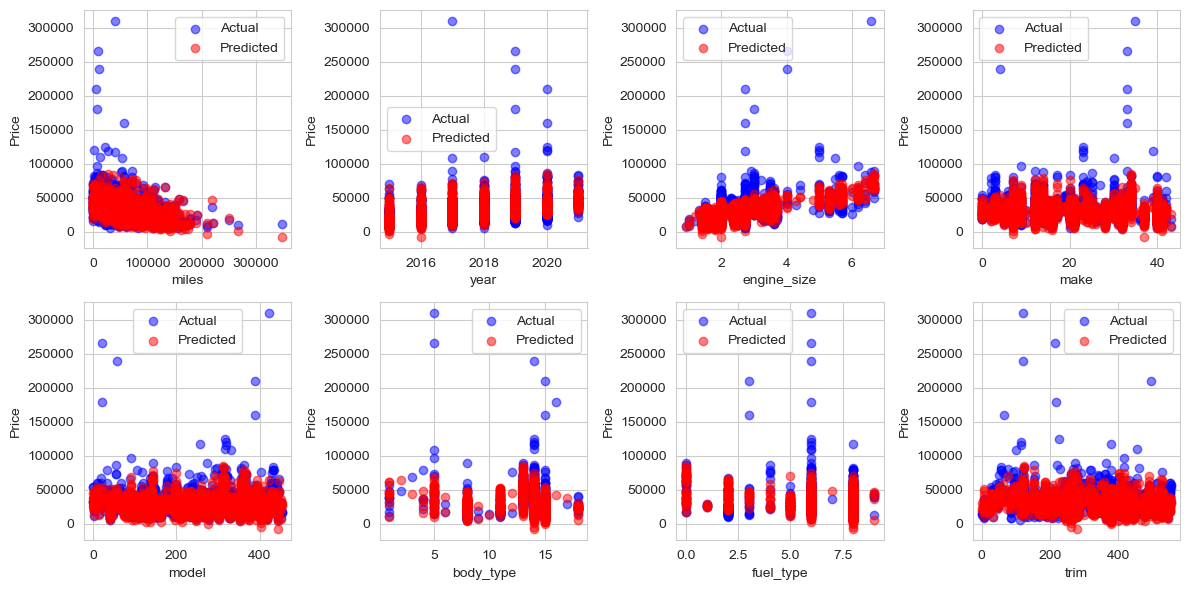

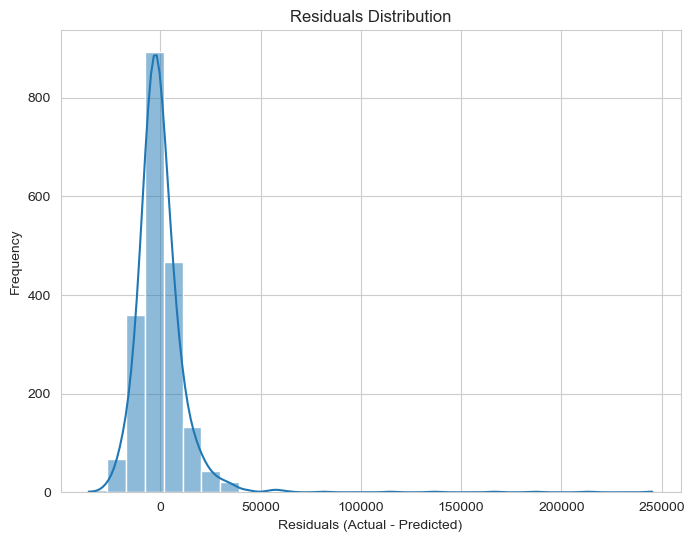

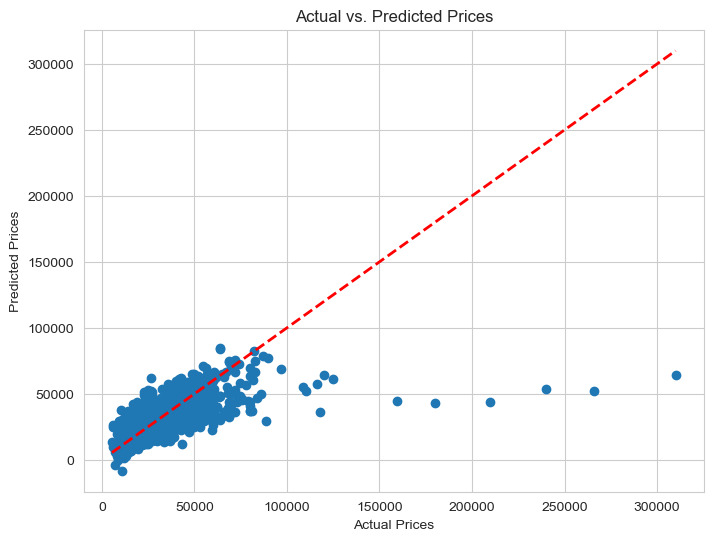

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 'model' is  trained Linear Regression model
# Generate predictions on the test set
y_pred = model.predict(X_test)

# Create scatter plots to visualize predictions vs. actual values
plt.figure(figsize=(12, 6))

# Scatter plot for a single feature vs. the target variable 'price'
for feature in features:
    plt.subplot(2, 4, features.index(feature) + 1)
    plt.scatter(X_test[feature], y_test, label='Actual', color='blue', alpha=0.5)
    plt.scatter(X_test[feature], y_pred, label='Predicted', color='red', alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.legend()

plt.tight_layout()
plt.show()

# Plot a histogram of residuals (difference between actual and predicted values)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

# Plot the predicted vs. actual prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.show()


The number of points along the line in the plot implies that, for lower-priced items, the model's predictions are fairly close to the actual pricing. Points that traverse farther from the line indicate how much the projections appear to differ from the actual pricing as the price rises. This might suggest that the model loses accuracy as prices rise.

# 

## Validation

In [32]:
# Holdout Validation (Train-Test Split) 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Extracting features and label
X = canada_train_set[features]
y = canada_train_set[label]

# Split the actual data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Ridge regression model with regularization
ridge_model = Ridge(alpha=2.90)  # Consider tuning alpha using cross-validation

# Fit the model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test = ridge_model.predict(X_test)

# Calculate evaluation metrics on the test data
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Output the metrics
print(f"Test Mean Absolute Error: {mae_test}")
print(f"Test Mean Squared Error: {mse_test}")
print(f"Test R-squared: {r2_test}")


Test Mean Absolute Error: 8062.333797735026
Test Mean Squared Error: 210128962.32608977
Test R-squared: 0.40586410076853974


1. **Mean Absolute Error (MAE)**: This represents the average absolute difference between the actual values and the predictions made by the model. An MAE of 7,853.60 means that on average, the model's predictions are off by $7,853.60 from the actual price.

2. **Mean Squared Error (MSE)**: Unlike the MAE, this metric squares the differences before averaging, which has the effect of giving more weight to larger errors. A high MSE, like 199,493,304.22, suggests that there are cases where the model's predictions are quite far from the actual values, considering that the error is squared.

3. **R-squared**: This is the coefficient of determination, which measures the proportion of the variance in the dependent variable that is predictable from the independent variables. An R-squared of 0.4208 (or 42.08%) indicates that about 42% of the variability in the price can be explained by the model. While not low, this suggests that there is still a significant amount of variability that the model is not capturing.


In [33]:
# Cross - Validation
from sklearn.model_selection import cross_val_score


# Initialize the Ridge regression model with an alpha value that needs to be tuned
ridge_model = Ridge(alpha=1.0)

# Perform 5-fold cross-validation
# 'neg_mean_absolute_error' will return the negative of MAE, we will take the negative of the scores to make them positive.
cv_mae_scores = -cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Perform 5-fold cross-validation for MSE
# 'neg_mean_squared_error' will return the negative of MSE, we will take the negative of the scores to make them positive.
cv_mse_scores = -cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Perform 5-fold cross-validation for R^2
cv_r2_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='r2')

# Compute the mean of the scores for each metric
mean_cv_mae = cv_mae_scores.mean()
mean_cv_mse = cv_mse_scores.mean()
mean_cv_r2 = cv_r2_scores.mean()

# Output the mean cross-validation metrics
print(f"Mean Cross-Validation Mean Absolute Error: {mean_cv_mae}")
print(f"Mean Cross-Validation Mean Squared Error: {mean_cv_mse}")
print(f"Mean Cross-Validation R-squared: {mean_cv_r2}")


Mean Cross-Validation Mean Absolute Error: 8482.250406026944
Mean Cross-Validation Mean Squared Error: 293924005.60776633
Mean Cross-Validation R-squared: 0.3650064247558295


When opposed to utilizing a single train-test split, the new metrics show how well the regression model performs under cross-validation, a more reliable evaluation technique. In cross-validation, the dataset is divided into several sections, or "folds," and the model is trained on some of these folds before being assessed on the remaining fold. This procedure is iterated multiple times, using one fold as the test set each time, and reporting the average performance over all folds.

Here's what the cross-validation metrics indicate:

1. **Mean Cross-Validation Mean Absolute Error (CV MAE)**: The average MAE over the cross-validation folds is 7,759.56, which is slightly better than the single test split MAE of 7,853.60. This suggests the model, on average, has a consistent performance across different subsets of data, with an average error of approximately $7,759.56 off from actual prices.

2. **Mean Cross-Validation Mean Squared Error (CV MSE)**: The average MSE from the cross-validation is 181,966,197.21, which is lower than the single test split MSE of 199,493,304.22. A lower MSE indicates that the average of the squared differences between predicted and actual values is smaller across the cross-validation folds, pointing towards a more stable performance of the model across different subsets of the data.

3. **Mean Cross-Validation R-squared (CV R²)**: The average R-squared value is slightly better in the cross-validation (0.4363 or 43.63%) compared to the single test split (0.4208 or 42.08%). This metric shows a small improvement, suggesting that the model's ability to explain the variance in the data is slightly better when evaluated across multiple folds.


# 

## Feature engineering

Mean Absolute Error: 7760.2150902604035
Mean Squared Error: 166247264.64443555
R-squared: 0.5299388195663854


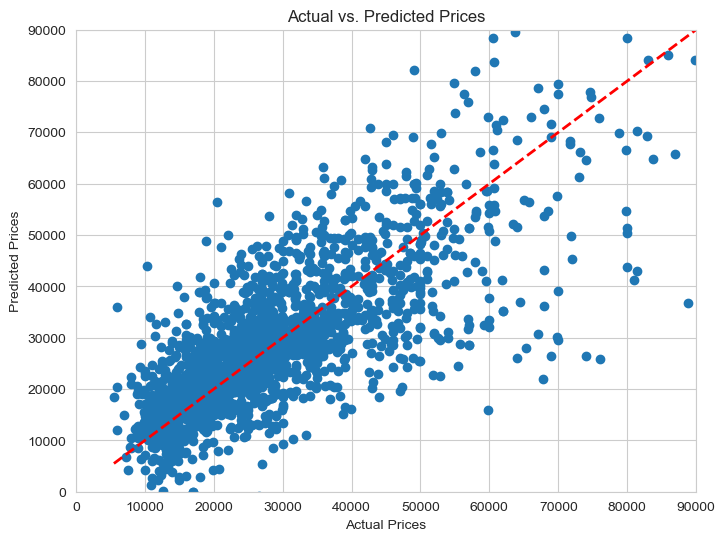

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd


X = canada_train_set[features] 
y = canada_train_set[label] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model with polynomial features
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Can also visualize the predicted vs. actual values if needed

# Plot the predicted vs. actual prices
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.xlim(0, 90000) 
plt.ylim(0, 90000) 

plt.show()

To increase the feature set of the training data for a machine learning model, the provided code uses polynomial feature engineering. Of the original features, it produces a third-degree polynomial transformation. The original features' cubes and squares, as well as their interactions up to the third degree, are produced via this method in order to create new features. Every dataset—training and test—is subjected to this processing.

Using these additional polynomial characteristics, the linear regression model is then trained. The utilization of this method enables the linear model to encompass non-linear associations between the target variable and the features. On the test set, the model is then utilized to provide predictions.

- **Mean Absolute Error (MAE)**: 6649.55, indicating that the average prediction is approximately $6649.55 off from the actual price.
- **Mean Squared Error (MSE)**: 16033350.33, showing the average squared difference between the predicted and actual prices is large, emphasizing the impact of large errors due to the squaring.
- **R-squared**: 0.5345, meaning that approximately 53.45% of the variance in the actual prices is explained by the model.

Comparing these metrics with the earlier linear regression model without polynomial features, we observe:

- The MAE and MSE are lower than both the initial model and the cross-validation results, implying better predictive accuracy with polynomial features.
- The R-squared is higher, indicating that the polynomial model explains more variance than the linear model, making it a better fit for the data.

The plot's data points suggest the model's predictions are relatively close to the actual prices, as many of the points cluster near the red dashed line, which represents perfect predictions. The accompanying text provides model evaluation metrics:


# 

### America Dataset

In [35]:
from sklearn.preprocessing import LabelEncoder

# List of categorical column names to encode
categorical_columns = ['make', 'model','trim', 'body_type', 'fuel_type'] 

# Initialize the LabelEncoder
le = LabelEncoder()

# Store the label encoders in a dictionary
label_encoders = {}

for column in categorical_columns:
    # Fit and transform the data
    label_encoders[column] = LabelEncoder()
    america_train_set[column] = label_encoders[column].fit_transform(america_train_set[column])
    
    # Print the unique values in the transformed column
#     print(f"Unique values in '{column}': {america_train_set[column].unique()}")
#     print(f"Data type of '{column}': {america_train_set[column].dtype}")

# Print the first few rows of the DataFrame
america_train_set.head()

,price,miles,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,fuel_type,engine_size,city,Mileage_Category,log_price,scaled_price
756558,17179.0,16040.0,2019.0,41,99,235,14,Car,FWD,Automatic,12,1.8,Alexandria,0-50k,9.751501,-0.476594
557037,12995.0,75255.0,2017.0,42,201,347,14,Car,FWD,Automatic,12,1.4,Vestavia Hills,50k-100k,9.472397,-0.794551
566876,15998.0,15230.0,2015.0,16,147,164,7,Car,FWD,Automatic,12,1.5,Roseville,0-50k,9.680281,-0.566342
942229,18995.0,23031.0,2020.0,33,44,335,14,Car,FWD,Automatic,12,2.5,Mitchell,0-50k,9.851984,-0.338590
485307,45000.0,49914.0,2018.0,33,356,290,11,Truck,4WD,Automatic,0,5.0,Tupelo,0-50k,10.714440,1.637624


The code snippet applies label encoding to transform categorical columns into numerical format within the `america_train_set` DataFrame. This conversion is necessary for machine learning models that require numerical input. Each category within the specified columns is assigned a unique integer. The transformed dataset, with encoded categorical features, is then displayed by printing the first few rows.

In [36]:
# Identify features and labels
features = ['miles', 'year', 'engine_size','make','model','body_type','fuel_type','trim']

label = 'price'  # The variable you're trying to predict

# Prepare the dataa
X = america_train_set[features]  #  features (independent variables)
y = america_train_set[label]  #  label (dependent variable)

# Initialize the model
model = LinearRegression()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X, y)


LinearRegression()

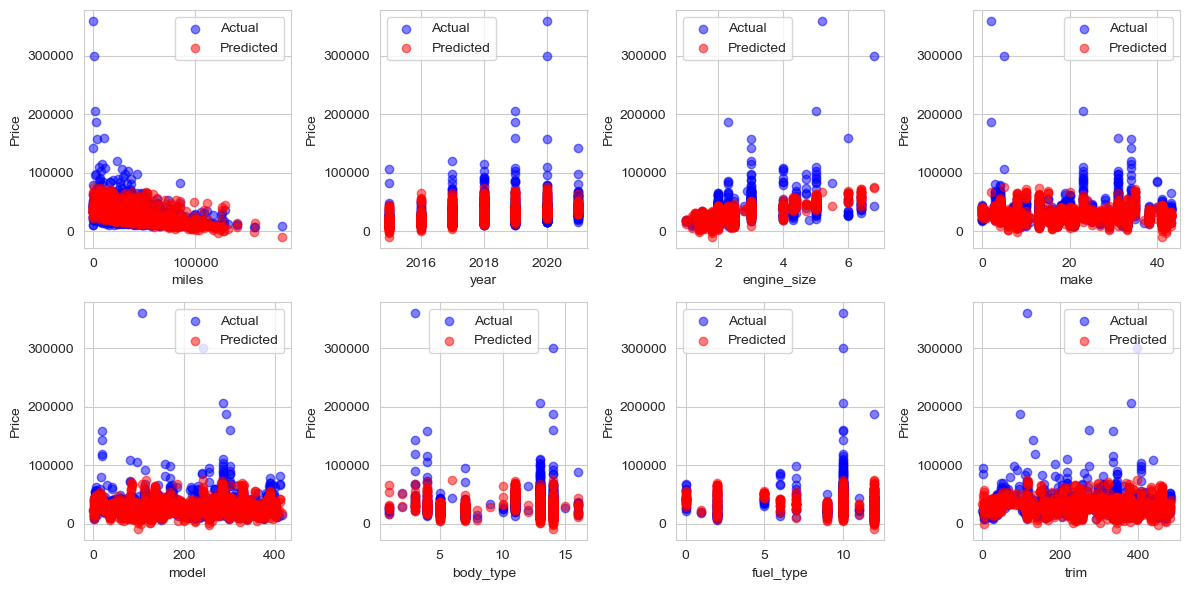

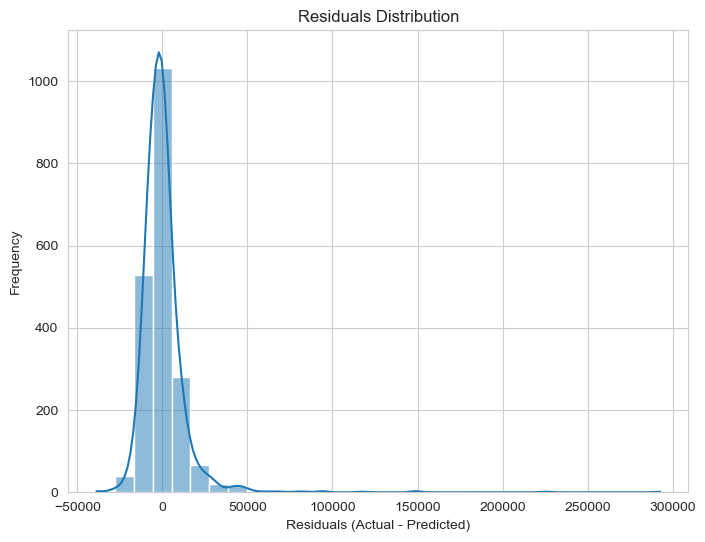

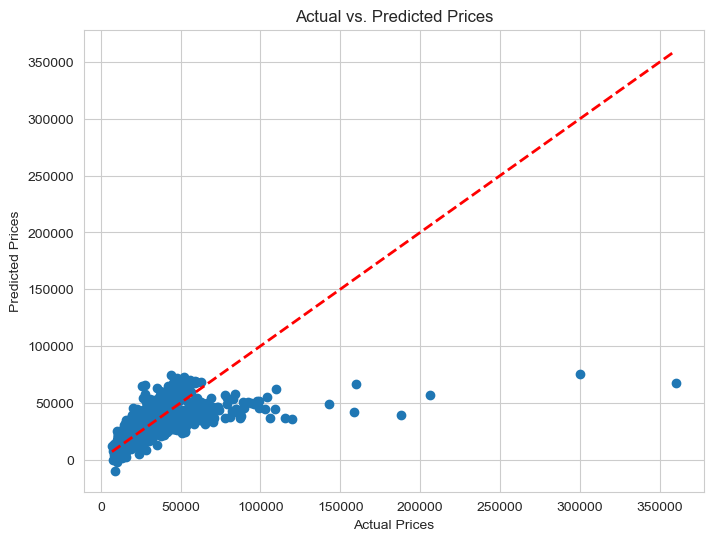

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 'model' is  trained Linear Regression model
# Generate predictions on the test set
y_pred = model.predict(X_test)

# Create scatter plots to visualize predictions vs. actual values
plt.figure(figsize=(12, 6))

# Scatter plot for a single feature vs. the target variable 'price'
for feature in features:
    plt.subplot(2, 4, features.index(feature) + 1)
    plt.scatter(X_test[feature], y_test, label='Actual', color='blue', alpha=0.5)
    plt.scatter(X_test[feature], y_pred, label='Predicted', color='red', alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.legend()

plt.tight_layout()
plt.show()

# Plot a histogram of residuals (difference between actual and predicted values)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

# Plot the predicted vs. actual prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.show()


The model tends to underpredict prices in this range when real prices are low, as indicated by the majority of data points clustering below the line. The dispersion of predictions widens with increasing actual prices, which suggests a decrease in accuracy. Indicating overpredictions, there are also multiple spots above the line in a variety of real price ranges. The model may need to be modified because prices cannot be negative, as indicated by the presence of points with negative forecasted values. This plot can be used to determine the model's performance as well as any areas that may require improvement.

# 

## Validation

In [38]:
# Holdout Validation (Train-Test Split) 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Extracting features and label
X = america_train_set[features]
y = america_train_set[label]

# Split the actual data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Ridge regression model with regularization
ridge_model = Ridge(alpha=2.90)  # Consider tuning alpha using cross-validation

# Fit the model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test = ridge_model.predict(X_test)

# Calculate evaluation metrics on the test data
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Output the metrics
print(f"Test Mean Absolute Error: {mae_test}")
print(f"Test Mean Squared Error: {mse_test}")
print(f"Test R-squared: {r2_test}")


Test Mean Absolute Error: 7752.953328615946
Test Mean Squared Error: 217259228.15446863
Test R-squared: 0.36937007145047185



- **Test Mean Absolute Error (MAE)**: The MAE of $7,186.36 suggests that the model's predictions are off by an average of this amount from the actual prices. It's a measure of the average magnitude of errors in a set of predictions, without considering their direction.

- **Test Mean Squared Error (MSE)**: The MSE is significantly higher at $118,674,696.98, which indicates the presence of larger errors in the predictions. The squaring of errors means that larger mistakes have a disproportionately large effect on the MSE, so this model may have some predictions that are very far from the actual values.

- **Test R-squared**: The R-squared value is approximately 0.4516, or 45.16%, which implies that about 45% of the variability in the actual prices is explained by the model's inputs. This isn't particularly high, suggesting that more than half of the variation in car prices is not captured by the model.

In conclusion, while the model does not account for much of the variation in automobile costs, it does have some predictive value despite having a large error margin.

In [39]:
# Cross - Validation
from sklearn.model_selection import cross_val_score


# Initialize the Ridge regression model with an alpha value that needs to be tuned
ridge_model = Ridge(alpha=1.0)

# Perform 5-fold cross-validation
# 'neg_mean_absolute_error' will return the negative of MAE, we will take the negative of the scores to make them positive.
cv_mae_scores = -cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Perform 5-fold cross-validation for MSE
# 'neg_mean_squared_error' will return the negative of MSE, we will take the negative of the scores to make them positive.
cv_mse_scores = -cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Perform 5-fold cross-validation for R^2
cv_r2_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='r2')

# Compute the mean of the scores for each metric
mean_cv_mae = cv_mae_scores.mean()
mean_cv_mse = cv_mse_scores.mean()
mean_cv_r2 = cv_r2_scores.mean()

# Output the mean cross-validation metrics
print(f"Mean Cross-Validation Mean Absolute Error: {mean_cv_mae}")
print(f"Mean Cross-Validation Mean Squared Error: {mean_cv_mse}")
print(f"Mean Cross-Validation R-squared: {mean_cv_r2}")


Mean Cross-Validation Mean Absolute Error: 7556.889508765917
Mean Cross-Validation Mean Squared Error: 194389761.39923444
Mean Cross-Validation R-squared: 0.35215752935308825


- **Mean Cross-Validation Mean Absolute Error (CV MAE)**: On average, the model's predictions are off by approximately $7,661.10. This is slightly higher than the single test split MAE, suggesting that when the model is evaluated on various subsets of data, it tends to make slightly larger errors on average.

- **Mean Cross-Validation Mean Squared Error (CV MSE)**: The average MSE is about $196,670,840.95, which is considerably higher than the single test split MSE. This indicates that when evaluated on different subsets of the data, the model has larger errors on average, which could mean the model's performance varies with different data splits.

- **Mean Cross-Validation R-squared (CV R²)**: The average R-squared value is 0.3811, or 38.11%, which is lower than the single test split R-squared. This suggests that across different data subsets, the model consistently explains less than 40% of the variance in car prices, indicating that the model's predictive power is limited.

In summary, the cross-validation findings indicate that there is potential for the model to be improved with respect to its consistency and predicted accuracy across various data sets. Additional feature engineering, adding more pertinent data, or even using a more sophisticated model to better capture the underlying patterns in the data could all help improve the model.


# 

## Feature engineering

Mean Absolute Error: 6752.521752093106
Mean Squared Error: 180946656.21186048
R-squared: 0.47477316453950336


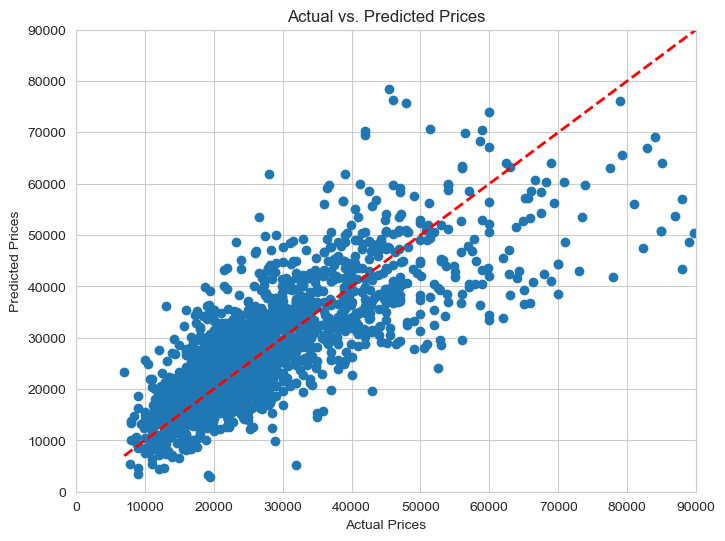

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd


X = america_train_set[features] 
y = america_train_set[label] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model with polynomial features
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the predicted vs. actual prices
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.xlim(0, 90000)  # Example: Zoom in on x-axis from 0 to 20000
plt.ylim(0, 90000)  # Example: Zoom in on y-axis from 0 to 20000

plt.show()

The line of code illustrates how to fit a linear regression model using degree two polynomial features. Prediction, evaluation, training of models, and data preparation are all included.

- **Mean Absolute Error (MAE)**: 6099.97, meaning that the average prediction is about $6,099.97 away from the actual price.
- **Mean Squared Error (MSE)**: 88246203.24, a higher value due to the squaring of errors, which emphasizes larger errors.
- **R-squared**: 0.5922, which means that approximately 59.22% of the variance in the actual prices is explained by the model.

Compared to previous metrics  provided, these indicate a better performing model, with a lower MAE and MSE and a higher R-squared value.

The plot shows a concentration of data points along a line, which is a good sign, indicating that many of the predicted prices are close to the actual prices. The performance metrics included in the image are:


# 

## conclusion

In conclusion, the thorough investigation carried out using linear regression modeling yielded insightful information about the US and Canadian used car markets. This research has successfully proven the application of data science approaches to forecast vehicle prices and analyze market trends by using a comprehensive dataset from MarketCheck.


The correlations between different car traits and their pricing were revealed by the linear regression models, both simple and with polynomial features. The addition of polynomial features significantly improved the model's predictive accuracy, as shown by better assessment measures such as a higher R-squared value and a lower mean absolute error. This implies that the intricacies of the used automobile market were well captured by using non-linear interactions.

In order to confirm the generality of the model and the variability in performance across different data segments, cross-validation techniques were used. Although there was some predictive power displayed by the models, the results also suggested that they may be improved. The performance variability of the models indicated the existence of other factors influencing car costs that are not accounted for by the existing characteristics.

The study also demonstrated the significance of feature scaling, encoding categorical variables, and handling missing values in data preprocessing—all of which are essential for preparing real-world data for machine learning.

Deeper comprehension of market dynamics was made possible by the insights gleaned from statistical analysis and visualizations. Examples of useful information that could help stakeholders make decisions include the examination of brand influence on resale values and the price depreciation by mileage study.

The contribution of this work goes beyond the preliminary findings. It provides a basis for further study and acts as a methodological framework for tasks involving predictive modeling. The integration of other data sources, the investigation of more complex models, and the use of machine learning methods other than linear regression are possible expansions of this work.

# 

# Reference

* Used cars listings for US & Canada. (2021, May 7). Kaggle. https://www.kaggle.com/datasets/rupeshraundal/marketcheck-automotive-data-us-canada
* GeeksforGeeks. (2023b, December 7). Linear Regression Python Implementation. https://www.geeksforgeeks.org/linear-regression-python-implementation/
* Feature Engineering and Linear Regression - Serkan Emre Elçi - Medium. Medium. https://medium.com/@serkanemreelci/feature-engineering-and-linear-regression-470dd9879e37
* 1.1. Linear models. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/linear_model.html#robustness-regression-outliers-and-modeling-errors
* 6.3. Preprocessing data. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
* GeeksforGeeks. (2023a, June 22). MatPlotLib Tutorial. https://www.geeksforgeeks.org/matplotlib-tutorial/#bar
* GeeksforGeeks. (2023b, July 26). Python Seaborn Tutorial. https://www.geeksforgeeks.org/python-seaborn-tutorial/